In [69]:
import pandas as pd
import numpy as np
# import sklearn.datasets
from sklearn.preprocessing import LabelEncoder
import autosklearn.classification
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [76]:
# iris = sklearn.datasets.load_iris()

# df = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/attention.csv')
df = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/exercise.csv')
target = 'kind'

X = df.drop(target, axis=1)
y = df[target]

In [77]:
X['diet'] = LabelEncoder().fit_transform(X['diet'])
X['time'] = LabelEncoder().fit_transform(X['time'])
y = LabelEncoder().fit_transform(y)

In [78]:
def run_train_test_split(df, target):
    from sklearn.cross_validation import train_test_split
    test_size = 0.2
    
    print("Train/test split executed, test size =", test_size)
    return train_test_split(df, target, test_size=test_size)

X_train, X_test, y_train, y_test = run_train_test_split(X, y)

X_train = np.ascontiguousarray(X_train)
X_test = np.ascontiguousarray(X_test)

print(type(X_train), type(y_train))
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

Train/test split executed, test size = 0.2
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(72, 5) (72,)
(18, 5) (18,)


In [79]:
X_train[:5]

array([[ 35,  12,   0, 104,   2],
       [ 52,  18,   1,  96,   1],
       [ 81,  28,   1, 103,   0],
       [ 82,  28,   1, 124,   1],
       [ 87,  30,   1,  99,   0]])

In [80]:
y_train[:5]

array([2, 2, 1, 1, 1])

In [81]:
automl = autosklearn.classification.AutoSklearnClassifier(time_left_for_this_task=10, 
                                                          per_run_time_limit=1, 
                                                          ml_memory_limit=10000)
automl.fit(X_train, y_train)
print(automl.score(X_test,y_test))

[INFO] [2016-09-10 21:56:20,429:AutoML(1):13017fcdd5a35bb182d99abb3e5e4ebd] Starting to create dummy predictions.
[INFO] [2016-09-10 21:56:20,462:AutoML(1):13017fcdd5a35bb182d99abb3e5e4ebd] Finished creating dummy prediction 1/2.
[INFO] [2016-09-10 21:56:20,499:AutoML(1):13017fcdd5a35bb182d99abb3e5e4ebd] Finished creating dummy prediction 2/2.
[INFO] [2016-09-10 21:56:21,180:AutoML(1):13017fcdd5a35bb182d99abb3e5e4ebd] Start Ensemble with  9.24sec time left
[INFO] [2016-09-10 21:56:21,190:AutoML(1):13017fcdd5a35bb182d99abb3e5e4ebd] Start SMAC with  9.23sec time left
[ERROR] [2016-09-10 21:56:21,207:EnsembleBuilder(1):13017fcdd5a35bb182d99abb3e5e4ebd] Model only predicts at random: /tmp/autosklearn_tmp_20940_7916/.auto-sklearn/predictions_ensemble/predictions_ensemble_1_00001.npy has score: -0.02
[INFO] [2016-09-10 21:56:21,212:EnsembleBuilder(1):13017fcdd5a35bb182d99abb3e5e4ebd] Ensemble Selection:
	Trajectory: 0: 0.040000
	Members: [0]
	Weights: [ 1.]
	Identifiers: (1, 2)
[INFO] [2016-

/Users/alex/anaconda/envs/p3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:1147: RuntimeWarning: Degrees of freedom <= 0 for slice.
  warnings.warn("Degrees of freedom <= 0 for slice.", RuntimeWarning)
/Users/alex/anaconda/envs/p3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


[INFO] [2016-09-10 21:56:22,152:AutoMLSMBO(1)::13017fcdd5a35bb182d99abb3e5e4ebd] Calculating Metafeatures (categorical attributes) took  0.02
[INFO] [2016-09-10 21:56:22,186:AutoMLSMBO(1)::13017fcdd5a35bb182d99abb3e5e4ebd] Calculating Metafeatures (encoded attributes) took  0.02sec


/Users/alex/anaconda/envs/p3/lib/python3.5/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


[INFO] [2016-09-10 21:56:22,312:AutoMLSMBO(1)::13017fcdd5a35bb182d99abb3e5e4ebd] Time left for 13017fcdd5a35bb182d99abb3e5e4ebd after finding initial configurations:  7.11sec
[INFO] [2016-09-10 21:56:22,314:AutoMLSMBO(1)::13017fcdd5a35bb182d99abb3e5e4ebd] Metafeatures for dataset 13017fcdd5a35bb182d99abb3e5e4ebduiaeo
  LandmarkRandomNodeLearner: 0.493650793651
  KurtosisMin: -1.97202797203
  NumberOfCategoricalFeatures: 0
  NumberOfInstancesWithMissingValues: 0.0
  SkewnessMean: 0.221084173144
  SymbolsMin: 0
  KurtosisMax: 1.94202107971
  SymbolsMax: 0
  PercentageOfInstancesWithMissingValues: 0.0
  LogInverseDatasetRatio: 2.66722820658
  ClassEntropy: 1.58249052019
  SkewnessSTD: 0.625946683875
  NumberOfClasses: 3.0
  SkewnessMin: -0.167248402001
  SymbolsSTD: 0
  ClassProbabilityMin: 0.3194444444444444
  PercentageOfFeaturesWithMissingValues: 0.0
  DatasetRatio: 0.06944444444444445
  SymbolsMean: 0
  SymbolsSum: 0.0
  LogNumberOfInstances: 4.27666611902
  ClassProbabilitySTD: 0.019

In [82]:
predictions = automl.predict(X_test)
predictions

array([0, 1, 0, 0, 2, 2, 0, 1, 0, 0, 0, 0, 2, 1, 1, 1, 2, 0])

In [83]:
probs = automl.predict_proba(X_test)
probs

array([[ 0.589 ,  0.38  ,  0.031 ],
       [ 0.    ,  0.845 ,  0.155 ],
       [ 0.62  ,  0.38  ,  0.    ],
       [ 0.6076,  0.38  ,  0.0124],
       [ 0.0062,  0.411 ,  0.5828],
       [ 0.0186,  0.4296,  0.5518],
       [ 0.6076,  0.38  ,  0.0124],
       [ 0.2108,  0.3986,  0.3906],
       [ 0.6138,  0.38  ,  0.0062],
       [ 0.5456,  0.38  ,  0.0744],
       [ 0.5766,  0.38  ,  0.0434],
       [ 0.496 ,  0.3862,  0.1178],
       [ 0.0124,  0.4296,  0.558 ],
       [ 0.    ,  0.9504,  0.0496],
       [ 0.    ,  0.845 ,  0.155 ],
       [ 0.    ,  0.8512,  0.1488],
       [ 0.031 ,  0.4482,  0.5208],
       [ 0.5332,  0.38  ,  0.0868]])

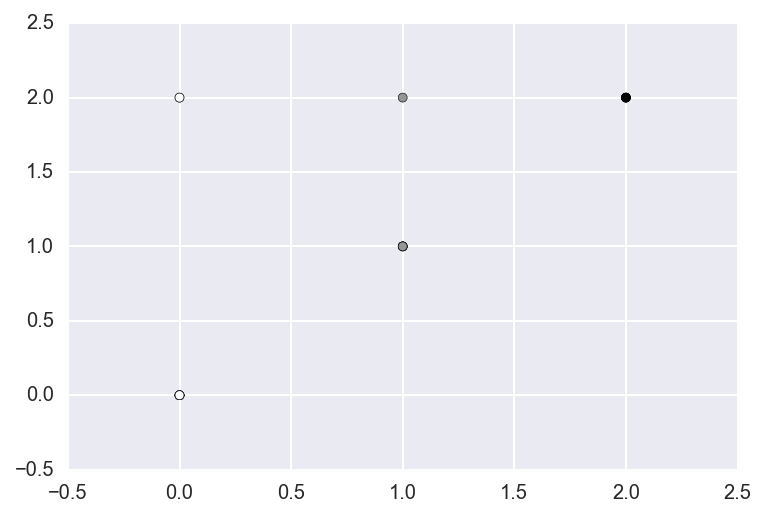

In [85]:
plt.scatter(predictions, y_test, c=[np.argmax(x) for x in probs])
# plt.scatter([np.argmax(x) for x in probs], y_test)
# plt.scatter([x[1] for x in probs], y_test)
# plt.scatter(predictions, y_test)